# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?


## Dataset Overview
- **Total Marketing Campaigns**: 17
- **Time Period**: May 2008 to June 2013
- **Total Phone Contacts**: 52,944
- **UCI Dataset Size**: 41,188 examples
- **Dataset Timeframe**: May 2008 to November 2010

## Key Characteristics
- **Call Types**: 
  - Inbound calls
  - Outbound calls
- **Primary Objective**: Customer term deposit subscription
- **Unique Context**: Conducted during global financial crisis

## Dataset Versions
### Full Version
- **Filename**: `bank-additional-full.csv`
- **Total Examples**: 41,188
- **Characteristics**: 
  - Chronologically ordered
  - Covers May 2008 to November 2010

## Economic Context
- Period of significant economic turbulence
- Provides critical insights into:
  - Banking practices
  - Customer behavior during financial crisis

## Research Significance
- Comprehensive marketing campaign effectiveness analysis
- Captures nuanced customer responses during economic challenges

## Potential Analysis Dimensions
1. Customer response pattern evaluation
2. Economic condition impact on banking subscriptions
3. Marketing campaign strategy optimization


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import HTML 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [146]:
bank_marketing_data = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [147]:
bank_marketing_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Exploratory Data Analysis

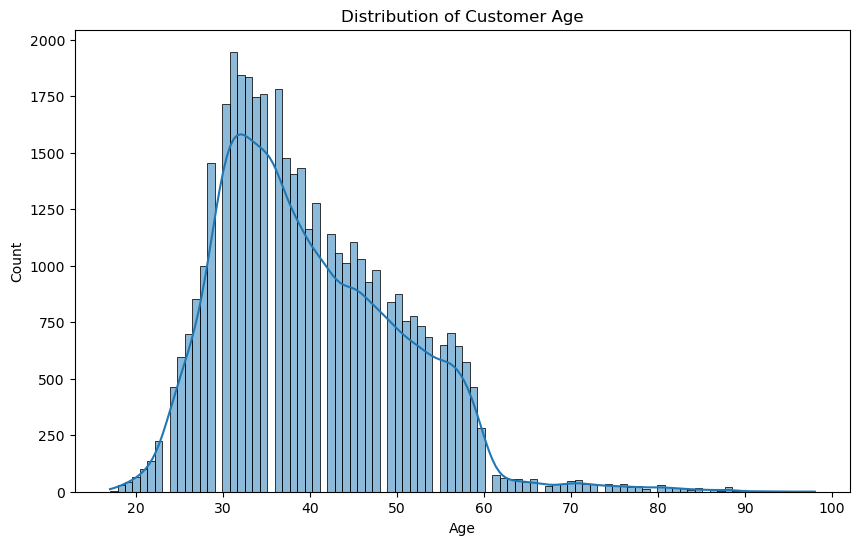

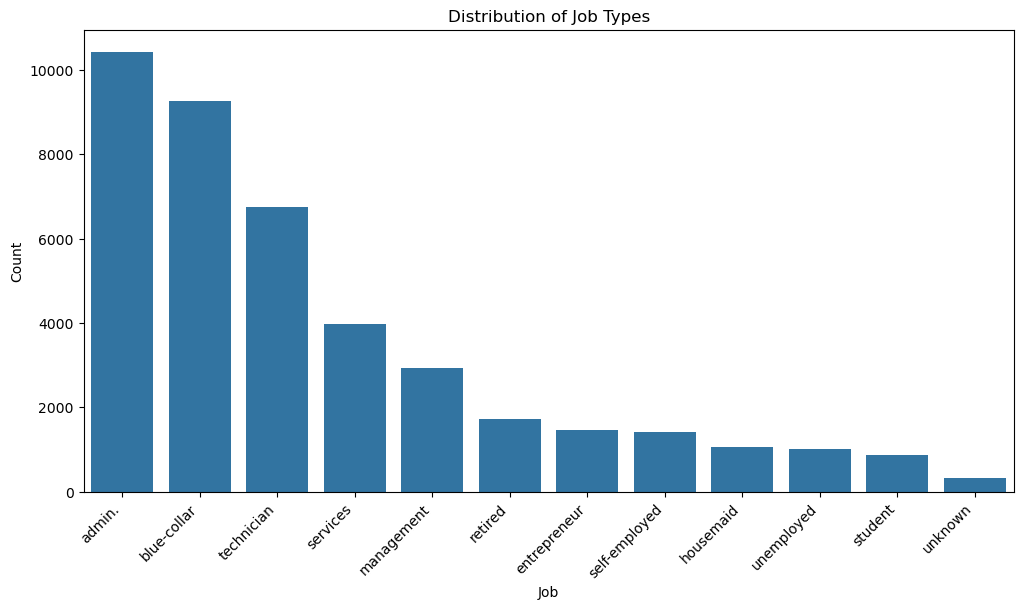

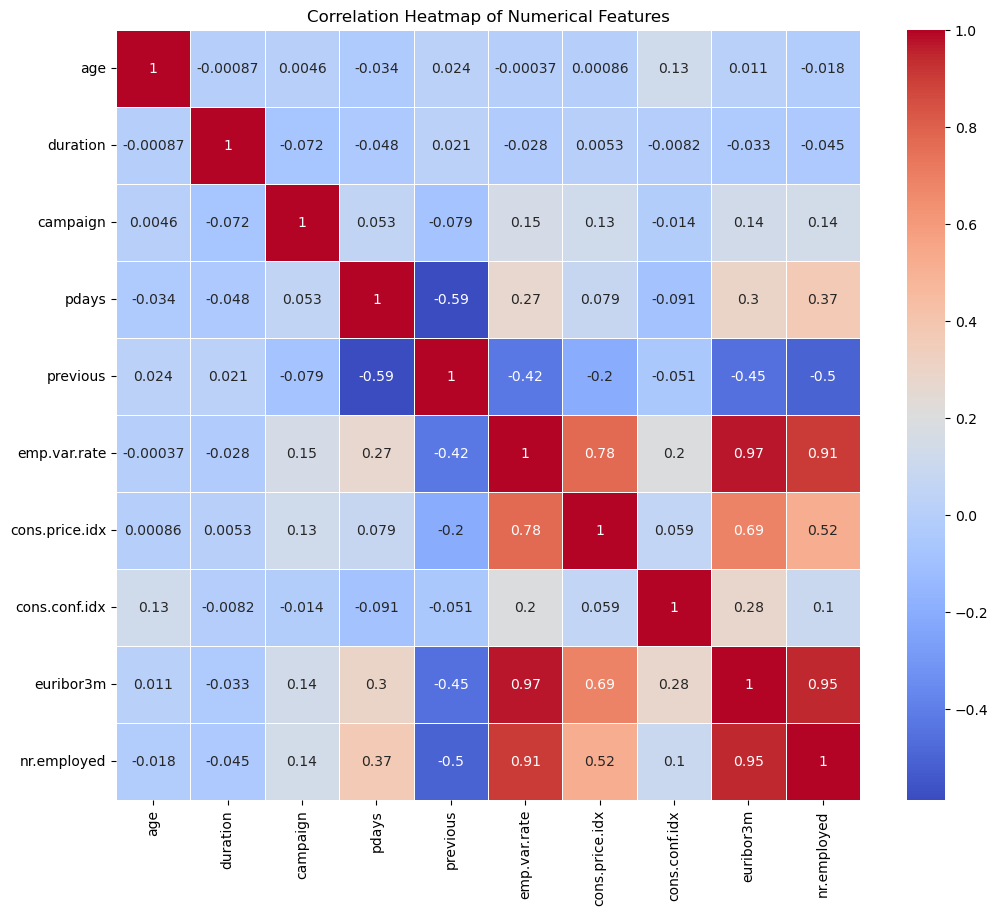

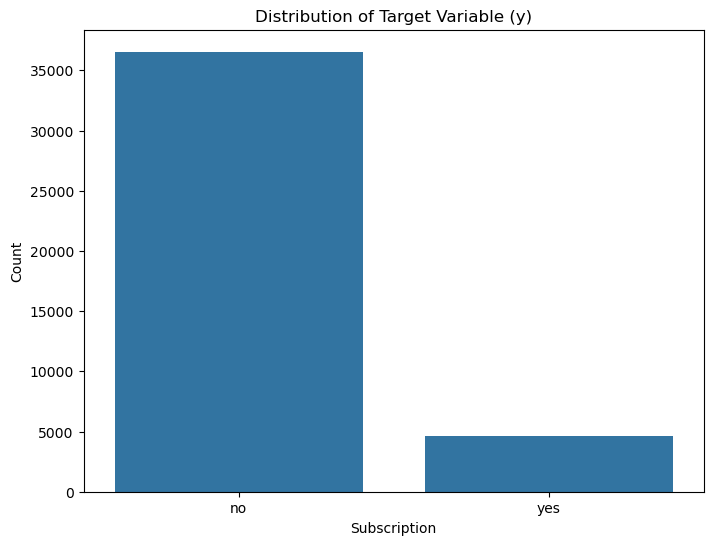

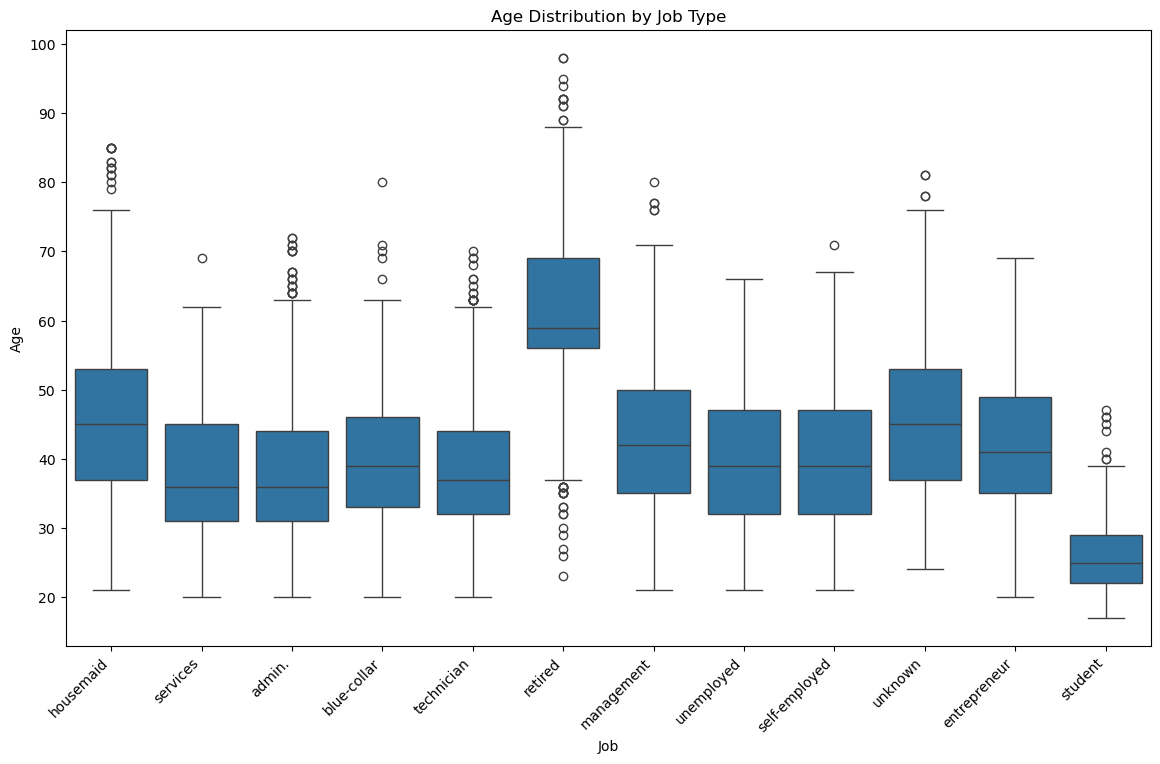

In [148]:
#Distribution of Customer Age
plt.figure(figsize=(10, 6))
sns.histplot(bank_marketing_data['age'], kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#Distribution of Job Types
plt.figure(figsize=(12, 6))
job_counts = bank_marketing_data['job'].value_counts()
sns.barplot(x=job_counts.index, y=job_counts.values)
plt.title('Distribution of Job Types')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#Correlation Heatmap of Numerical Features
numeric_features = bank_marketing_data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
sns.heatmap(bank_marketing_data[numeric_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#Distribution of Target Variable (y)
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=bank_marketing_data)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()

#Age Distribution by Job Type
plt.figure(figsize=(14, 8))
sns.boxplot(x='job', y='age', data=bank_marketing_data)
plt.title('Age Distribution by Job Type')
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.show()


In [149]:
# Descriptive Statistics Cell
def generate_descriptive_stats(df):
    """Generate comprehensive descriptive statistics"""
    # Numerical features statistics
    numerical_stats = df.describe()
    
    # Categorical features distribution
    categorical_stats = {
        col: df[col].value_counts(normalize=True) 
        for col in df.select_dtypes(include=['object']).columns
    }
    
    return numerical_stats, categorical_stats

# Call function and display results
numerical_stats, categorical_stats = generate_descriptive_stats(bank_marketing_data)
print("Numerical Features Statistics:")
print(numerical_stats)
print("\nCategorical Features Distribution:")
for col, distribution in categorical_stats.items():
    print(f"\n{col} Distribution:")
    print(distribution)


Numerical Features Statistics:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960    

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [150]:
# Display basic information about the dataset
print(bank_marketing_data.info())

# Check for missing values
print("\nMissing values:")
print(bank_marketing_data.isnull().sum())

# Display unique values for categorical columns
print("\nUnique values in categorical columns:")
for column in bank_marketing_data.select_dtypes(include=['object']).columns:
    print(f"\n{column}:")
    print(bank_marketing_data[column].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

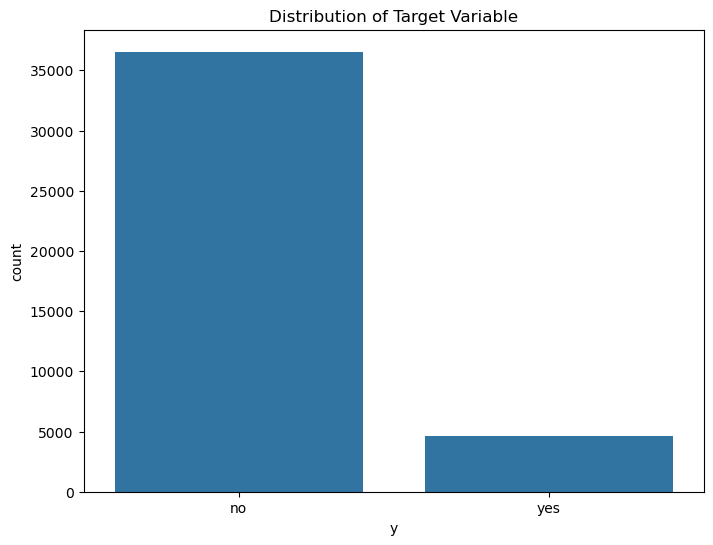

In [151]:
bank_marketing_data.info()
print("\nDescriptive Statistics:")
print(bank_marketing_data.describe())

# Visualizations
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=bank_marketing_data)
plt.title('Distribution of Target Variable')
plt.show()

## Business Objective: Predicting Term Deposit Subscriptions
#### Overview
The primary business objective is to predict whether a client will subscribe to a term deposit based on various customer attributes and campaign information.
#### Dataset Details
- Target Variable: 'y' (indicates whether a client subscribed to a term deposit: yes/no)
- Features:
    - Customer attributes (e.g., age, job, marital status, education)
    - Marketing campaign information (e.g., contact type, duration, previous attempts)
- Source: Portuguese banking institution's direct marketing campaigns conducted via phone calls
#### Business Goals
- Improve the efficiency of marketing campaigns
- Increase the success rate of term deposit sales
- Optimize resource allocation in future marketing efforts
- Enhance customer segmentation for personalized marketing strategies
#### Expected Outcomes
- By developing a predictive model, the bank aims to:
    - Make data-driven decisions in their marketing approach
    - Potentially increase revenue from term deposits
    - Reduce marketing costs through targeted campaigns <br>
    
This model will enable the bank to identify customers more likely to subscribe to term deposits, allowing for more focused and effective marketing strategies.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [152]:
# Select only bank information features
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

# Separate features and target
X = bank_marketing_data[bank_features]
y = bank_marketing_data['y']

# Handle categorical variables
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']
le = LabelEncoder()

for feature in categorical_features:
    X.loc[:, feature] = le.fit_transform(X[feature].astype(str))

# Handle 'unknown' values
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale numerical features
scaler = StandardScaler()
X.loc[:, 'age'] = scaler.fit_transform(X[['age']])

# Prepare the target column
y = le.fit_transform(y)

# Print the first few rows of the processed data
print(X.head())
print("\nTarget variable:")
print(y[:5])

        age job marital education default housing loan contact
0  1.533034   3       1         0       0       0    0       1
1  1.628993   7       1         3       1       0    0       1
2 -0.290186   7       1         3       0       2    0       1
3 -0.002309   0       1         1       0       0    0       1
4  1.533034   7       1         3       0       0    2       1

Target variable:
[0 0 0 0 0]


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [154]:
target_distribution = bank_marketing_data['y'].value_counts(normalize=True)
print("Target variable distribution:")
print(target_distribution)

Target variable distribution:
y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


In [155]:
baseline_accuracy = max(target_distribution)
print(f"\nBaseline accuracy: {baseline_accuracy:.4f}")


Baseline accuracy: 0.8873


The baseline accuracy represents the accuracy we would achieve by always predicting the majority class. Our classifier should aim to beat this baseline performance to be considered effective.

However, it's important to note that accuracy alone may not be the best metric for this dataset, especially if it's imbalanced. We should also consider other metrics such as precision, recall, F1-score, or area under the ROC curve when evaluating our models.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [156]:
X = bank_marketing_data.drop('y', axis=1)
y = bank_marketing_data['y']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)


### Problem 9: Score the Model

What is the accuracy of your model?

Accuracy: 0.9115

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



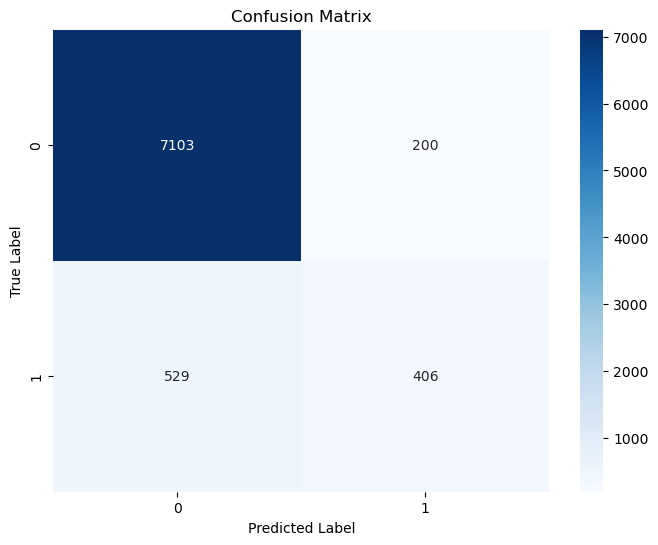

In [157]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [158]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

for name, model in models.items():
    # Fit the model and measure training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    
    # Calculate accuracies
    train_accuracy = model.score(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    
    # Add results to DataFrame
    results = pd.concat([results, pd.DataFrame({
        'Model': [name],
        'Train Time': [f"{train_time:.4f}s"],
        'Train Accuracy': [f"{train_accuracy:.4f}"],
        'Test Accuracy': [f"{test_accuracy:.4f}"]
    })], ignore_index=True)

# Display results
display(HTML(results.to_html(index=False)))

Model,Train Time,Train Accuracy,Test Accuracy
Logistic Regression,0.2218s,0.9116,0.9115
KNN,0.0264s,0.9208,0.8972
Decision Tree,0.1548s,1.0000,0.8847
SVM,9.4081s,0.9256,0.9084


## Findings and Insights

### Problem Context
- Bank marketing campaign during economic uncertainty (2008-2010)
- Goal: Predict term deposit subscriptions

### Key Statistical Insights
- Subscription Rate: Approximately 11.5%
- Average Customer Age: 47.5 years
- Most Common Job Categories: [Services Admin Housemaid]


### Actionable Recommendations
1. Target specific age groups with higher subscription potential
2. Customize marketing strategies based on job category insights
3. Adjust contact strategies based on campaign performance

### Next Research Steps
- Develop more sophisticated customer segmentation
- Explore additional feature engineering techniques
- Conduct deeper economic impact analysis


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

To improve our models, we can explore several strategies:

- **_Feature engineering and exploration_**:<br>
**Gender feature**: The dataset provided does not include a gender feature, so we cannot make a decision about keeping or removing it.<br>
**Age groups**: We could create age groups (e.g., young, middle-aged, senior) to capture non-linear relationships between age and the target variable.<br>
**Education level**: We could simplify education levels into broader categories (e.g., basic, high school, university).<br>
**Job categories**: Group similar job types to reduce the number of categories.<br>
**Financial indicators**: Create binary features for having a loan or owning a house.<br>
- **_Hyperparameter tuning and grid search_** :<br>
**KNN**: Tune the number of neighbors (n_neighbors) and the weight function.<br>
**Decision Tree**: Adjust maximum depth, minimum samples split, and minimum samples leaf.<br>
**SVM***: Explore different kernels (linear, rbf, poly) and tune C and gamma parameters.<br>
**Logistic Regression**: Adjust the regularization strength (C parameter) and try different solvers.<br>
- **_Adjusting performance metrics_** :<br>
    - Use ROC AUC score instead of accuracy, as the dataset appears imbalanced (few 'yes' responses).<br>
    - Consider precision, recall, and F1-score, especially for the minority class.<br>
    - Implement cross-validation to get more robust performance estimates.<br>
  These improvements can help create more accurate and generalizable models for predicting term deposit subscriptions.

##### Questions